In [8]:
# update Dec 9 2022: use concat instead of append, which is deprecated 

### import tree file from Ensembl 100, including branch distance

In [1]:
import ete3 # cannot run/install on osx-arm64 (e.g., M1 MacBook Pro) native environment 

In [2]:
with open('../data/species_tree.branch_len.nw') as reader:
    nw=(reader.read())

In [3]:
tree = ete3.PhyloTree(nw)

In [4]:
import inflection

In [5]:
# Set how species names are handled (default is first three letters, here we have a human readable format)
def parse_sp_name(node_name):
    return node_name
tree.set_species_naming_function(parse_sp_name)

In [6]:
import numpy as np
import pandas as pd

In [30]:
# dist_df=pd.DataFrame(columns=['NW_name','Human_distance','Mouse_distance','Chicken_distance'])
dist_list = []

for species in tree.iter_species():
    name=inflection.humanize(species)
    h_distance=(tree&"homo_sapiens").get_distance((tree&species))
    m_distance=(tree&"mus_musculus").get_distance((tree&species))
    c_distance=(tree&"gallus_gallus").get_distance((tree&species))
    dist_list.append({
        'NW_name':name,
        'Human_distance':h_distance,
        'Mouse_distance':m_distance,
        'Chicken_distance':c_distance
    })
dist_df = pd.DataFrame(dist_list)
# dist_df.set_index('NW_name',inplace=True)

In [31]:
dist_df.sort_values(by=['Mouse_distance'],inplace=True)

In [32]:
dist_df

,NW_name,Human_distance,Mouse_distance,Chicken_distance
135,Mus musculus,0.209356,0.000000,0.274328
134,Mus musculus c57bl6nj,0.210053,0.000897,0.275025
142,Mus musculus akrj,0.209429,0.002219,0.274401
140,Mus musculus aj,0.209496,0.002285,0.274468
136,Mus musculus nzohlltj,0.209921,0.002510,0.274893
...,...,...,...,...
1,Drosophila melanogaster,0.362670,0.376367,0.378062
3,Ciona intestinalis,0.382602,0.396299,0.397995
4,Ciona savignyi,0.385854,0.399551,0.401247
2,Caenorhabditis elegans,0.396760,0.410457,0.412152


### Match species names in tree nodes to my species IDs and common names

In [33]:
# Bird and reptile species
# b_df = pd.read_excel('../data/species_nw.xlsx',sheet_name='Reptilia')
# b_df = pd.merge(b_df,dist_df,left_on='NW_name',right_index=True,how='left')

In [34]:
mammal_order_df = pd.read_excel('../data/species_nw.xlsx',sheet_name='Mammals')
m_df=pd.merge(mammal_order_df,dist_df,left_on='NW_name',right_on='NW_name',how='left') # just 93 mammalian species
annot_dist_df=pd.merge(dist_df,mammal_order_df, left_on='NW_name', right_on='NW_name',how='left') # all species in tree

In [41]:
m_df.sort_values(by=['Mouse_distance'],inplace=True)
annot_dist_df.sort_values(by=['Mouse_distance'],inplace=True)

In [42]:
m_df.to_csv('../results/93_mammalian_sp.evolution_distance.tsv',sep='\t',index=False)

In [43]:
annot_dist_df.to_csv('../results/all_286_sp.evolution_distance.tsv',sep='\t',index=False)

In [44]:
human_df=m_df[m_df.SpeciesCommonName!='Human']
human_stats_df=pd.read_excel('../results/celltype-specific_descriptive_stats.xlsx',sheet_name='human reference genome')
human_df=pd.merge(human_df,human_stats_df,left_on='SpeciesCommonName',right_on='SpeciesCommonName',how='inner')
human_df.sort_values(by=['Human_distance'],inplace=True)

In [45]:
mouse_df=m_df[m_df.SpeciesCommonName!='Mouse']
mouse_stats_df=pd.read_excel('../results/celltype-specific_descriptive_stats.xlsx',sheet_name='mouse reference genome')
mouse_df=pd.merge(mouse_df,mouse_stats_df,left_on='SpeciesCommonName',right_on='SpeciesCommonName',how='inner')
mouse_df.sort_values(by=['Mouse_distance'],inplace=True)

In [46]:
mouse_df

,Ensembl98ID,SpeciesCommonName,NW_name,Order,Human_distance,Mouse_distance,Chicken_distance,Celltype,Median_dNdS,Confidence_Interval_Low,Confidence_Interval_High,Median_Absolute_Deviation
0,mspicilegus,Steppe mouse,Mus spicilegus,Rodentia,0.208688,0.019934,0.273661,neuron,0.181556,0.160494,0.203187,0.130010
1,mspicilegus,Steppe mouse,Mus spicilegus,Rodentia,0.208688,0.019934,0.273661,endothelia,0.255738,0.231034,0.283422,0.162517
2,mspicilegus,Steppe mouse,Mus spicilegus,Rodentia,0.208688,0.019934,0.273661,glia,0.242517,0.210938,0.280899,0.158686
3,mspicilegus,Steppe mouse,Mus spicilegus,Rodentia,0.208688,0.019934,0.273661,astrocyte,0.226261,0.198113,0.263279,0.145762
4,mspicilegus,Steppe mouse,Mus spicilegus,Rodentia,0.208688,0.019934,0.273661,microglia,0.282737,0.254902,0.307359,0.181079
...,...,...,...,...,...,...,...,...,...,...,...,...
546,neugenii,Wallaby,Notamacropus eugenii,Diprotodontia,0.234055,0.247752,0.265628,neuron,0.062643,0.053949,0.071237,0.033499
547,neugenii,Wallaby,Notamacropus eugenii,Diprotodontia,0.234055,0.247752,0.265628,endothelia,0.084513,0.073912,0.090878,0.043528
548,neugenii,Wallaby,Notamacropus eugenii,Diprotodontia,0.234055,0.247752,0.265628,glia,0.083109,0.076763,0.091451,0.043462
549,neugenii,Wallaby,Notamacropus eugenii,Diprotodontia,0.234055,0.247752,0.265628,astrocyte,0.084569,0.071551,0.100876,0.043717


In [49]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 600
sns.set_style('ticks')

In [65]:
# palette for mammals
palette={'Primates':'red', 'Carnivora':'silver', 'Scandentia':'blueviolet',
         'Eulipotyphla':'darkorange', 'Rodentia':'green','Artiodactyla':'orchid',
         'Lagomorpha':'lime', 'Cingulata':'gainsboro', 'Chiroptera':'steelblue', 
         'Pilosa':'gold','Perissodactyla':'blue', 'Proboscidea':'cornflowerblue',
         'Hyracoidea':'sandybrown', 'Afrosoricida':'purple','Dasyuromorphia':'cyan',
         'Diprotodontia':'olive', 'Didelphimorphia':'magenta'}

### Human Reference

<Figure size 720x540 with 0 Axes>

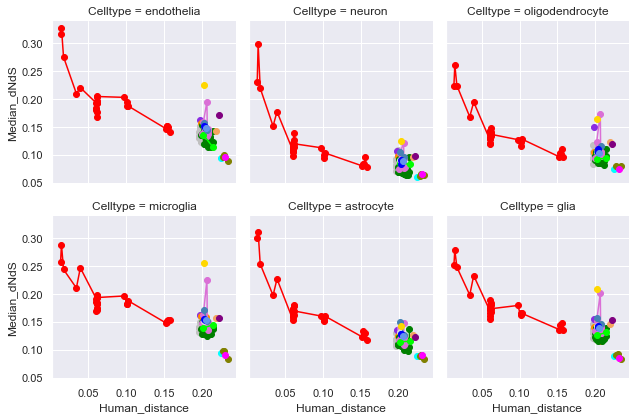

In [67]:
plt.figure(figsize=(10,7.5))
grid=sns.FacetGrid(human_df,col='Celltype',hue='Order',palette=palette,col_wrap=3)
grid.map(plt.plot, "Human_distance", "Median_dNdS",marker="o")
plt.savefig('../figures/evo_distance/NEGAMO.median_dNdS_vs_human_distance.svg')
# grid.set(yscale='log')
# grid.fig.tight_layout(w_pad=1)

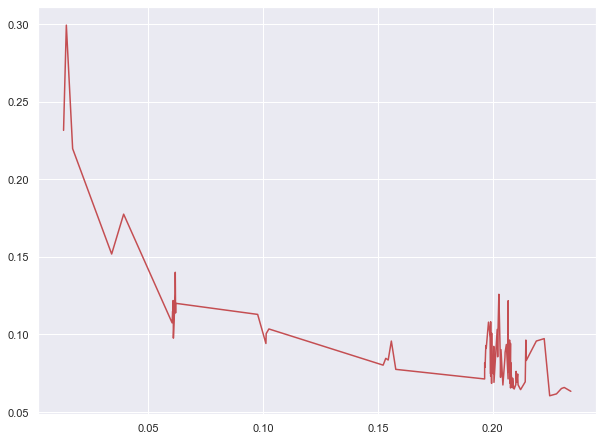

In [68]:
sns.set()
fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot(111)
data=human_df[human_df['Celltype']=='neuron']
ax = plt.plot(data["Human_distance"],data['Median_dNdS'],'r-')
plt.show()

In [69]:
import scipy.stats as stats

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


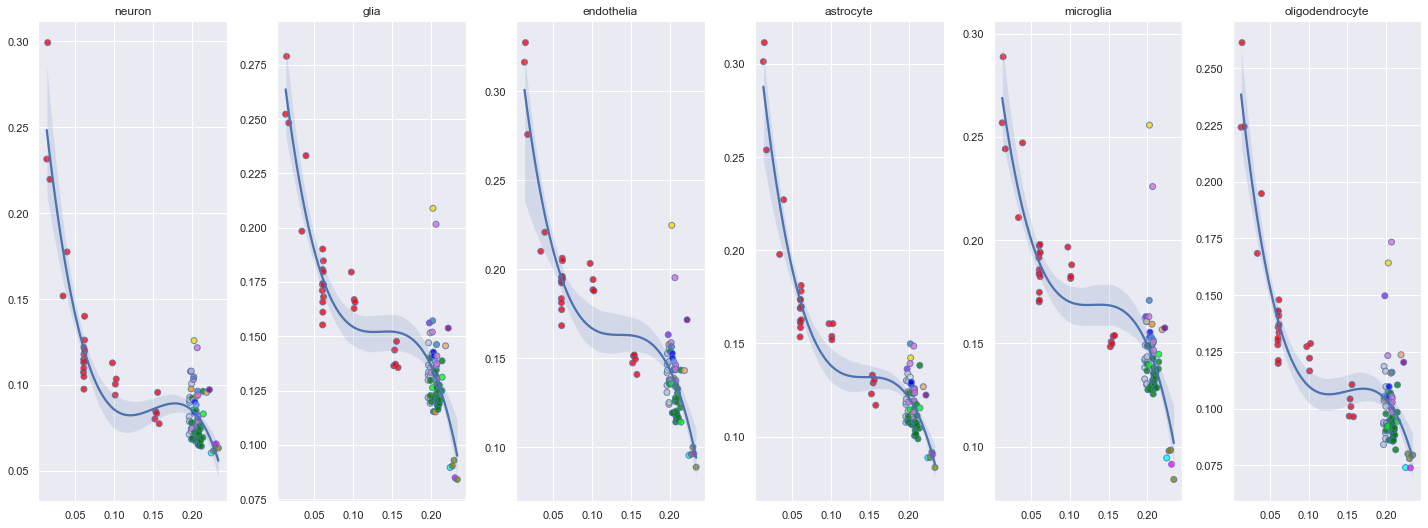

In [70]:
# grid = sns.FacetGrid(human_df,col='Celltype',col_wrap=3)

# grid.map(sns.jointplot,"Human_distance", "Median_dNdS",kind='reg')
# g = sns.lmplot(x='Human_distance',y='Median_dNdS',hue='Celltype',data=human_df,height=5)
# g.set(yscale='log')
# data=human_df.loc[:,['Celltype','Order','Median_dNdS','Human_distance']]
# sns.pairplot(data,diag_kind='auto')
palette={'Primates':'red', 'Carnivora':'silver', 'Scandentia':'blueviolet',
         'Eulipotyphla':'darkorange', 'Rodentia':'green','Artiodactyla':'orchid',
         'Lagomorpha':'lime', 'Cingulata':'gainsboro', 'Chiroptera':'steelblue', 
         'Pilosa':'gold','Perissodactyla':'blue', 'Proboscidea':'cornflowerblue',
         'Hyracoidea':'sandybrown', 'Afrosoricida':'purple','Dasyuromorphia':'cyan',
         'Diprotodontia':'olive', 'Didelphimorphia':'magenta'}
human_color_df=human_df.replace({'Order':palette})
fig,ax = plt.subplots(nrows=1,ncols=6, figsize=(20,7.5)) 
for i,celltype in enumerate(['neuron','glia','endothelia','astrocyte','microglia','oligodendrocyte']):
    plt.sca(ax[i]) 
    data=human_color_df[human_color_df['Celltype']==celltype]
#     data=data[data['Order']!='red']
    sns.regplot('Human_distance','Median_dNdS',data,scatter_kws={'facecolors':data['Order']},order=3)
    plt.title(celltype)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.savefig('../figures/evo_distance/fit.NEGAMO.median_dNdS_vs_human_distance.svg')

In [71]:
order_list=['Primates', 'Carnivora', 'Scandentia', 'Eulipotyphla', 'Rodentia',
       'Artiodactyla', 'Lagomorpha', 'Cingulata', 'Chiroptera', 'Pilosa',
       'Perissodactyla', 'Proboscidea', 'Hyracoidea', 'Afrosoricida',
       'Dasyuromorphia', 'Diprotodontia', 'Didelphimorphia']

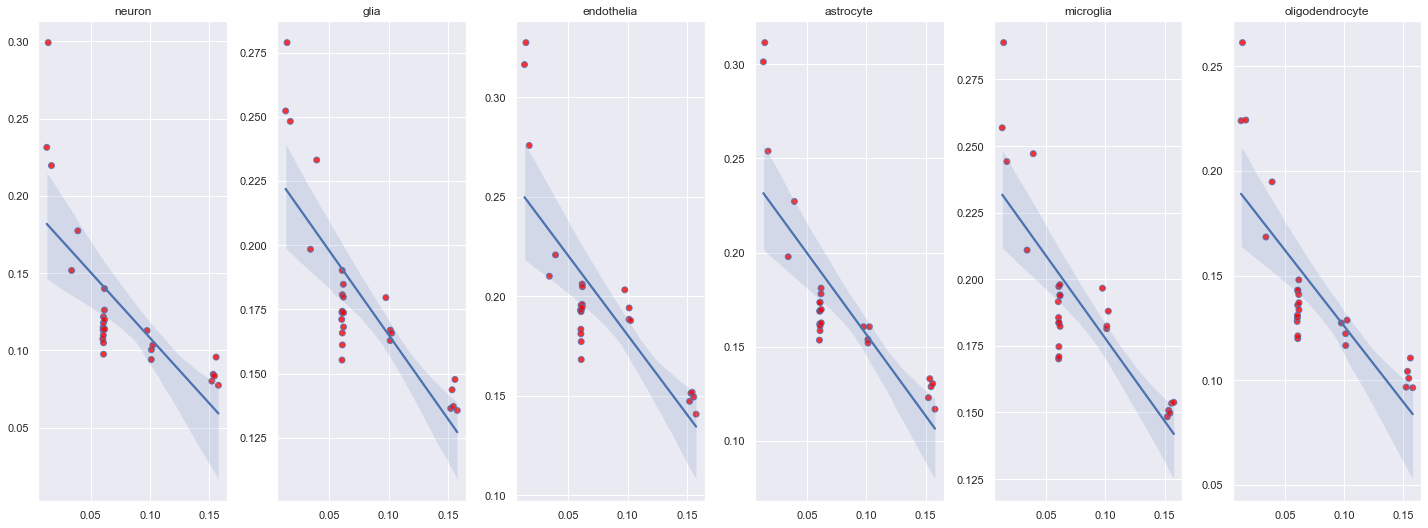

In [57]:
palette={'Primates':'red', 'Carnivora':'silver', 'Scandentia':'blueviolet',
         'Eulipotyphla':'darkorange', 'Rodentia':'green','Artiodactyla':'orchid',
         'Lagomorpha':'lime', 'Cingulata':'gainsboro', 'Chiroptera':'steelblue', 
         'Pilosa':'gold','Perissodactyla':'blue', 'Proboscidea':'cornflowerblue',
         'Hyracoidea':'sandybrown', 'Afrosoricida':'purple','Dasyuromorphia':'cyan',
         'Diprotodontia':'olive', 'Didelphimorphia':'magenta'}
human_color_df=human_df.replace({'Order':palette})
fig,ax = plt.subplots(nrows=1,ncols=6, figsize=(20,7.5)) 
for i,celltype in enumerate(['neuron','glia','endothelia','astrocyte','microglia','oligodendrocyte']):
    plt.sca(ax[i]) 
    data=human_color_df[human_color_df['Celltype']==celltype]
    data=data[data['Order']=='red']
    sns.regplot('Human_distance','Median_dNdS',data,scatter_kws={'facecolors':data['Order']},order=1)
    plt.title(celltype)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()

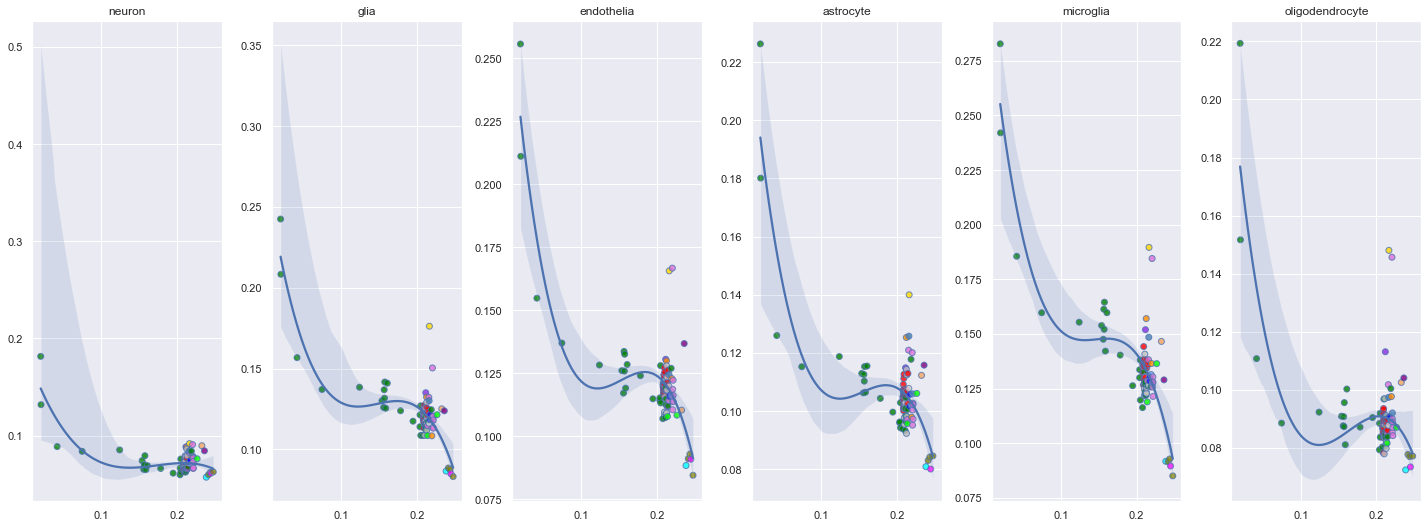

In [73]:
palette={'Primates':'red', 'Carnivora':'silver', 'Scandentia':'blueviolet',
         'Eulipotyphla':'darkorange', 'Rodentia':'green','Artiodactyla':'orchid',
         'Lagomorpha':'lime', 'Cingulata':'gainsboro', 'Chiroptera':'steelblue', 
         'Pilosa':'gold','Perissodactyla':'blue', 'Proboscidea':'cornflowerblue',
         'Hyracoidea':'sandybrown', 'Afrosoricida':'purple','Dasyuromorphia':'cyan',
         'Diprotodontia':'olive', 'Didelphimorphia':'magenta'}
mouse_color_df=mouse_df.replace({'Order':palette})
fig,ax = plt.subplots(nrows=1,ncols=6, figsize=(20,7.5)) 
for i,celltype in enumerate(['neuron','glia','endothelia','astrocyte','microglia','oligodendrocyte']):
    plt.sca(ax[i]) 
    data=mouse_color_df[mouse_color_df['Celltype']==celltype]
    sns.regplot('Mouse_distance','Median_dNdS',data,scatter_kws={'facecolors':data['Order']},order=3)
    plt.title(celltype)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.savefig('../figures/evo_distance/fit.NEGAMO.median_dNdS_vs_mouse_distance.svg')

<Figure size 720x540 with 0 Axes>

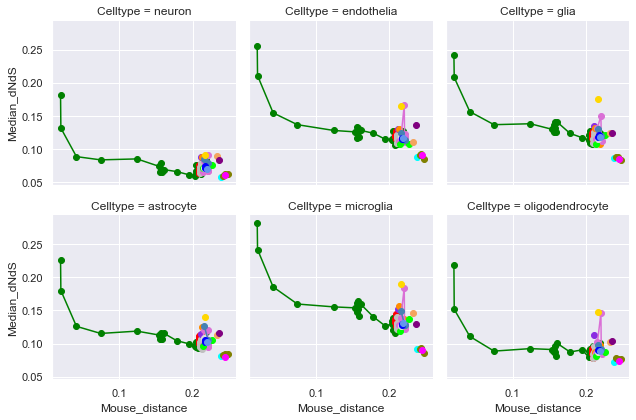

In [74]:
plt.figure(figsize=(10,7.5))
grid=sns.FacetGrid(mouse_df,col='Celltype',hue='Order',palette=palette,col_wrap=3)
grid.map(plt.plot, "Mouse_distance", "Median_dNdS",marker="o")
# grid.set(yscale='log')
# grid.fig.tight_layout(w_pad=1)
plt.savefig('../figures/evo_distance/NEGAMO.median_dNdS_vs_mouse_distance.svg')

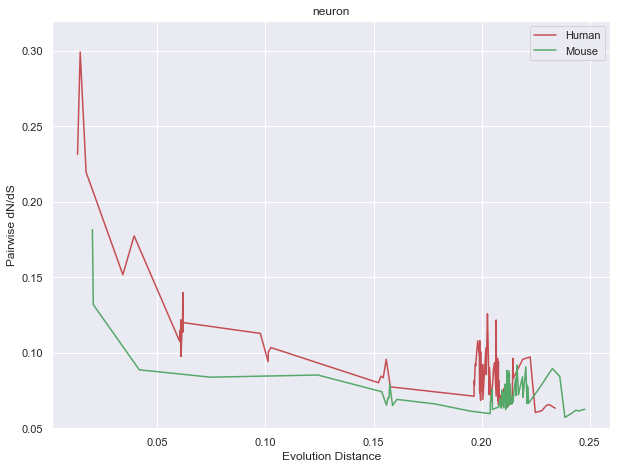

<Figure size 432x288 with 0 Axes>

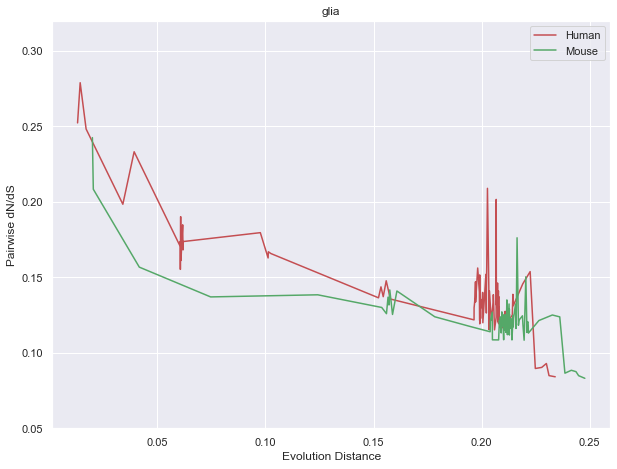

<Figure size 432x288 with 0 Axes>

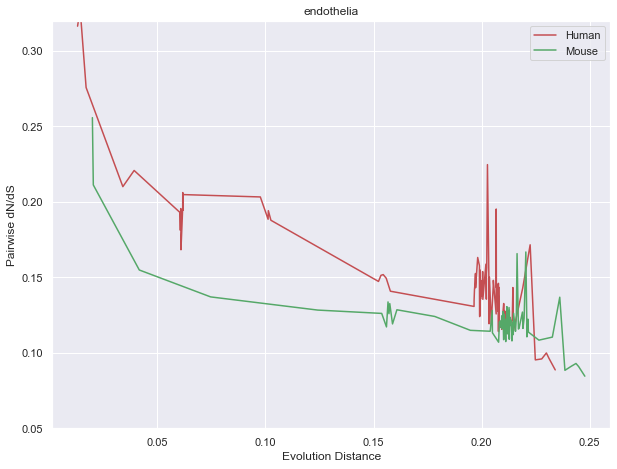

<Figure size 432x288 with 0 Axes>

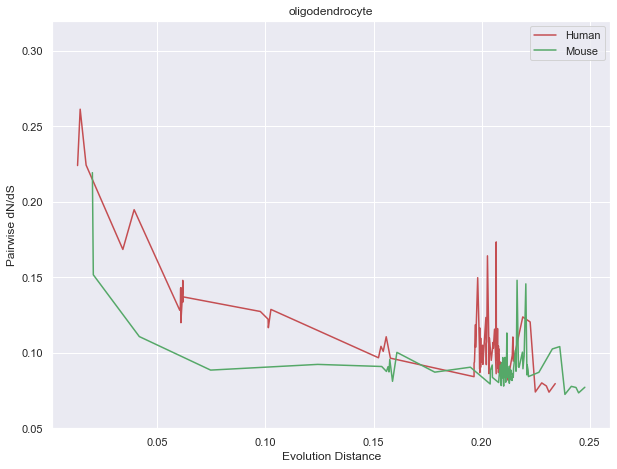

<Figure size 432x288 with 0 Axes>

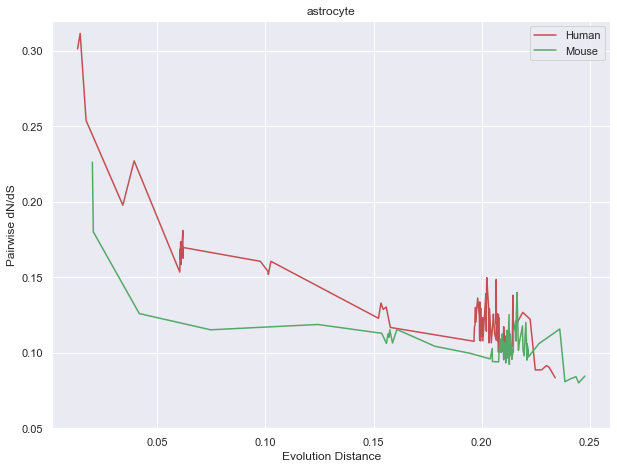

<Figure size 432x288 with 0 Axes>

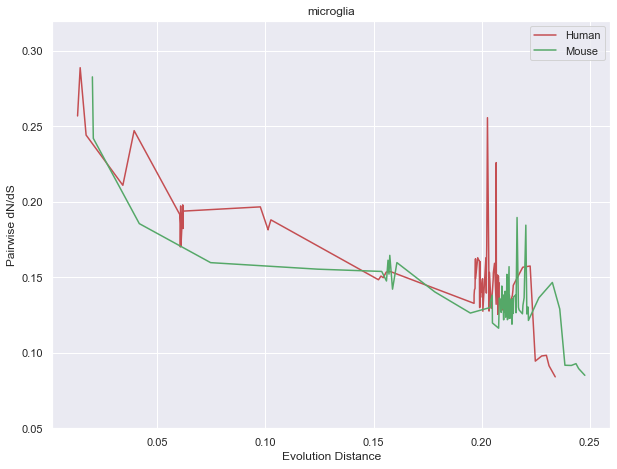

<Figure size 432x288 with 0 Axes>

In [75]:
for celltype in ['neuron','glia','endothelia','oligodendrocyte','astrocyte','microglia']:
    sns.set()
    fig = plt.figure(figsize=(10,7.5))
    ax = fig.add_subplot(111)
    ax.set(ylim=(0.05, 0.32))
    ax.set(xlabel='Evolution Distance', ylabel='Pairwise dN/dS')
    h_data=human_df[human_df['Celltype']==celltype]
    ax = plt.plot(h_data["Human_distance"],h_data['Median_dNdS'],'r-',label='Human')
    m_data=mouse_df[mouse_df['Celltype']==celltype]
    ax = plt.plot(m_data["Mouse_distance"],m_data['Median_dNdS'],'g-',label='Mouse')
    plt.legend()
    plt.title(celltype)
    plt.show()
    plt.savefig(f'../figures/evo_distance/{celltype}.mouse_and_human.NEGAMO.median_dNdS_vs_distance.svg')

In [76]:
palette={'endothelia':'tab:blue','glia':'tab:green','neuron':'tab:red','oligodendrocyte':'lightblue','astrocyte':'lightgreen','microglia':'tab:orange'}
palette['endothelia']

'tab:blue'

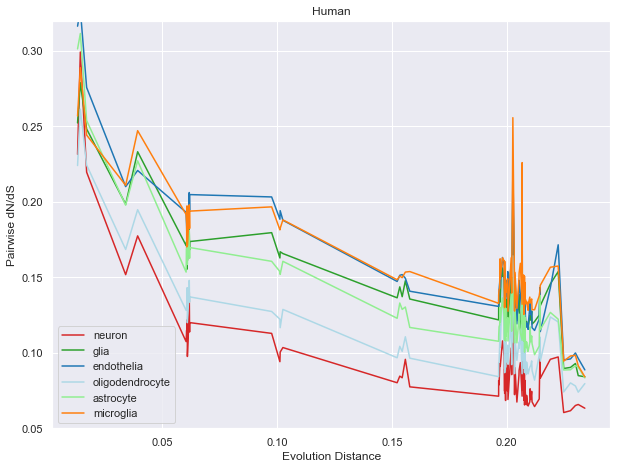

<Figure size 432x288 with 0 Axes>

In [77]:
#Human
palette={'endothelia':'tab:blue','glia':'tab:green','neuron':'tab:red','oligodendrocyte':'lightblue','astrocyte':'lightgreen','microglia':'tab:orange'}
sns.set()
fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot(111)
ax.set(ylim=(0.05, 0.32))
ax.set(xlabel='Evolution Distance', ylabel='Pairwise dN/dS')
for celltype in ['neuron','glia','endothelia','oligodendrocyte','astrocyte','microglia']:
    data=human_df[human_df['Celltype']==celltype]
    ax = plt.plot(data["Human_distance"],data['Median_dNdS'],'-',label=celltype,color=palette[celltype])
plt.legend()
plt.title('Human')
plt.show()
plt.savefig('../figures/evo_distance/NEGAMO-superimposed.dNdS_vs_human_distance.svg')

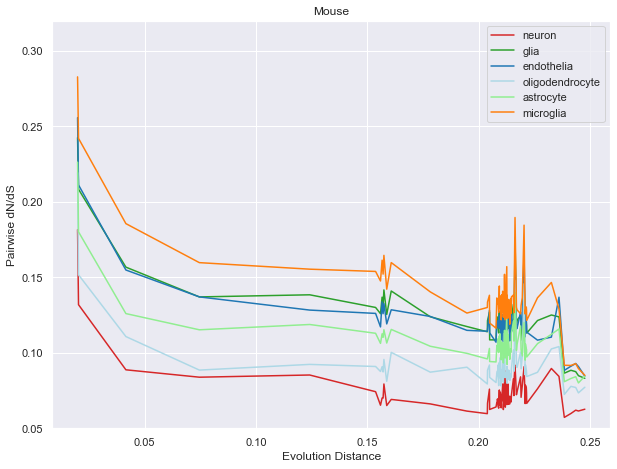

<Figure size 432x288 with 0 Axes>

In [78]:
#Mouse
palette={'endothelia':'tab:blue','glia':'tab:green','neuron':'tab:red','oligodendrocyte':'lightblue','astrocyte':'lightgreen','microglia':'tab:orange'}
sns.set()
fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot(111)
ax.set(ylim=(0.05, 0.32))
ax.set(xlabel='Evolution Distance', ylabel='Pairwise dN/dS')
for celltype in ['neuron','glia','endothelia','oligodendrocyte','astrocyte','microglia']:
    data=mouse_df[mouse_df['Celltype']==celltype]
    ax = plt.plot(data["Mouse_distance"],data['Median_dNdS'],'-',label=celltype,color=palette[celltype])
plt.legend()
plt.title('Mouse')
plt.show()
plt.savefig('../figures/evo_distance/NEGAMO-superimposed.dNdS_vs_mouse_distance.svg')